Accuracy: 0.83


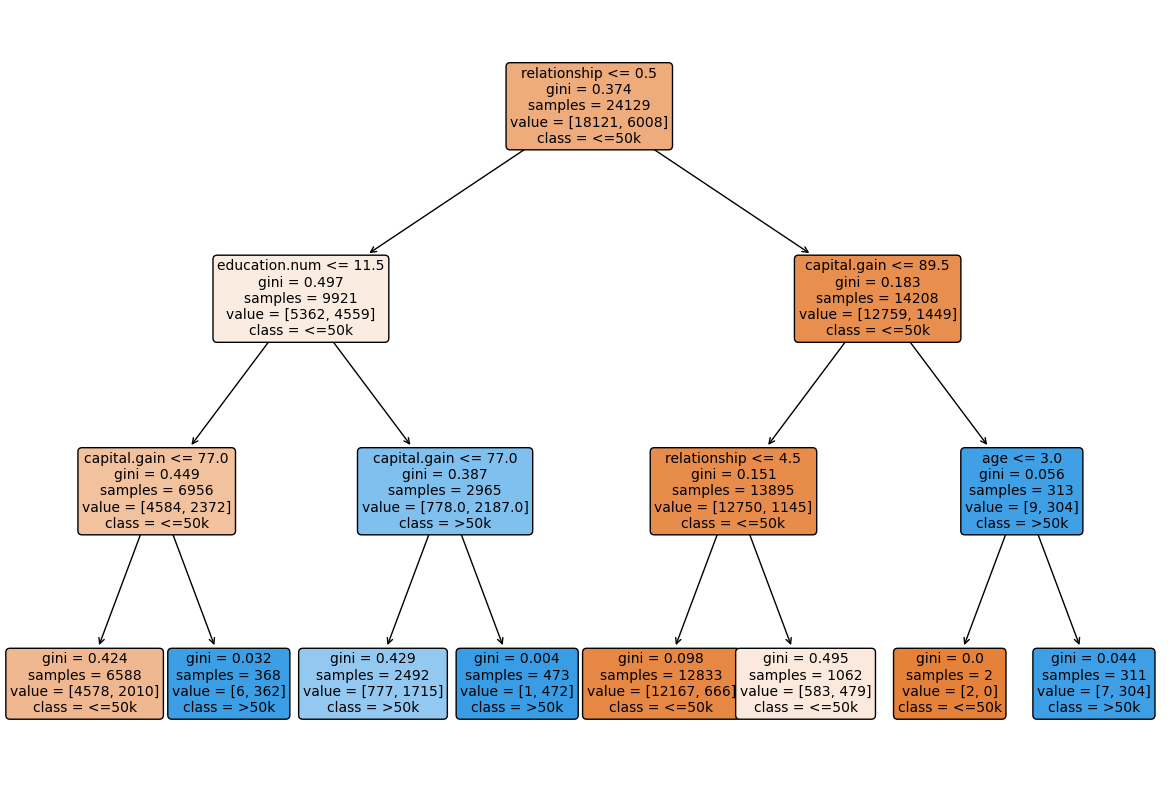

In [37]:
# Aim:  Build a decision tree to predict the income of a given population, 
#       which is labelled as <= 50Kand > 50K. The attributes (predictors) 
#       are age, working class type, marital status, gender, race etc.
# Binish Moosa
# 232P001  24
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Load and clean data
df = pd.read_csv('adult_dataset.csv')              # Load dataset
df = df.replace('?', np.nan).dropna()              # Replace '?' with NaN and drop missing

# Encode categorical variables numerically
df = df.apply(LabelEncoder().fit_transform)

# Split into features and target
X = df.drop('income', axis=1)                       # Features
y = df['income']                                    # Target variable

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42             # Fix random state for reproducibility
)

# Train Decision Tree Classifier with max depth of 3
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Display accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plt.title("Decision Tree Visualization by BE COMPUTER ENGG.", color="purple")

plot_tree(
    model,
    feature_names=X.columns.tolist(),   # Pass feature names as a list
    class_names=['<=50k', '>50k'],      # Class labels
    filled=True,
    rounded=True,
    fontsize=10
)

plt.tight_layout()
plt.show()


In [38]:
import tkinter as tk
from tkinter import messagebox
import numpy as np

# Assuming `model` and `X` are defined (your trained model and DataFrame features)

def predict_income():
    try:
        values = [int(entry.get()) for entry in entries]
        input_data = np.array(values).reshape(1, -1)
        prediction = model.predict(input_data)
        result = "<=50K" if prediction[0] == 0 else ">50K"
        messagebox.showinfo("Prediction Result", f"Predicted Income: {result}")
    except Exception as e:
        messagebox.showerror("Error", f"Invalid input: {e}")

features = X.columns.tolist()

root = tk.Tk()
root.title("💰 Income Prediction GUI")
root.geometry("900x500")   # Wider for two columns
root.configure(bg="#FADADD")  # Light pastel pink background

# Fonts and Colors
label_font = ("Segoe UI", 11, "bold")
entry_font = ("Segoe UI", 10)
label_fg = "#4A2C2A"        # Dark rose/brown
entry_bg = "white"          # White input boxes
entry_fg = "#4A2C2A"        # Dark text
entry_border = "#E75480"    # Pink border
button_bg = "#FF6699"       # Bright pink
button_hover_bg = "#E75480" # Darker pink hover
button_fg = "white"

entries = []

# Heading at the top
heading = tk.Label(
    root, text="Binish Moosa", 
    font=("Segoe UI", 18, "bold"),
    bg="#FADADD", fg="#4A2C2A"
)
heading.grid(row=0, column=0, columnspan=4, pady=(15, 20))

# Create labels and entries dynamically in 2 columns
cols = 2
for i, feature in enumerate(features):
    row = (i // cols) + 1   # shift down by 1 row (heading is at row=0)
    col = (i % cols) * 2
    
    label = tk.Label(root, text=feature, font=label_font, fg=label_fg, bg="#FADADD")
    label.grid(row=row, column=col, padx=(20, 10), pady=12, sticky="e")

    entry = tk.Entry(root, font=entry_font, bg=entry_bg, fg=entry_fg,
                     bd=1, relief="solid", highlightthickness=1,
                     highlightbackground=entry_border, insertbackground=entry_fg, width=22)
    entry.grid(row=row, column=col+1, padx=(10, 20), pady=12)
    entries.append(entry)

# Button hover functions
def on_enter(e):
    e.widget['background'] = button_hover_bg

def on_leave(e):
    e.widget['background'] = button_bg

# Predict Button centered below
predict_btn = tk.Button(
    root, text="🎯 Predict Income", command=predict_income,
    bg=button_bg, fg=button_fg,
    font=("Segoe UI", 13, "bold"),
    relief="flat",
    padx=15, pady=10,
    cursor="hand2",
    activebackground=button_hover_bg,
    activeforeground=button_fg,
)
predict_btn.grid(row=(len(features)//cols)+2, column=0, columnspan=cols*2, pady=(25, 20))

predict_btn.bind("<Enter>", on_enter)
predict_btn.bind("<Leave>", on_leave)

root.mainloop()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
Accuracy: 100.00%

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.

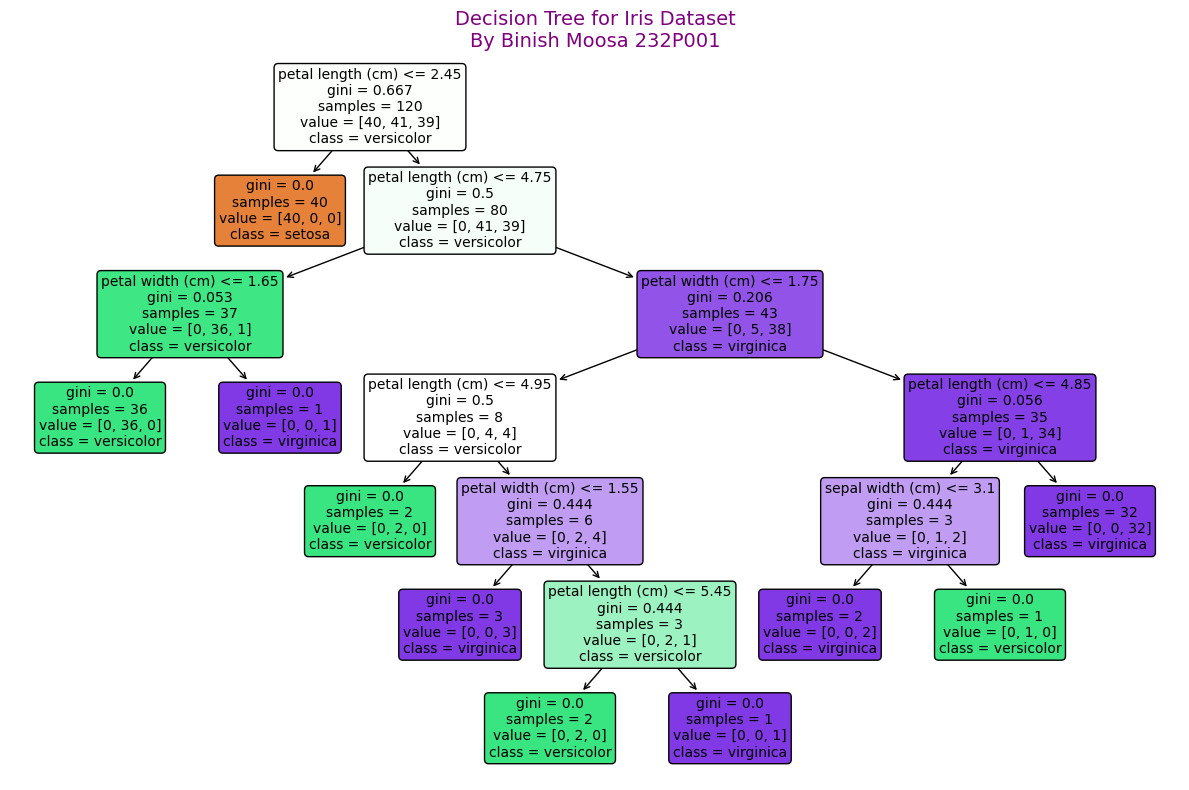


Feature Importances:
sepal length (cm): 0.00
sepal width (cm): 0.02
petal length (cm): 0.91
petal width (cm): 0.08


In [39]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target  # Features and Labels

# Optional: Convert to DataFrame for better analysis
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['species'])
print(df.head())  # Display first few rows

# 2. Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4. Make predictions
y_pred = clf.predict(X_test)

# 5. Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

# 6. Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Iris Dataset\nBy Binish Moosa 232P001", fontsize=14, color='purple')
plt.tight_layout()
plt.show()

# 7. Feature Importance
print("\nFeature Importances:")
for name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {importance:.2f}")
